# Algoritmos Gulosos


## Huffman


O código de Huffman é um algoritmo de compressão de dados sem perdas. A ideia é associar a largura variada de códigos aos caracteres de entrada, a largura dos códigos associados é proporcional a frequência dos caracteres de entrada.

Os códigos associados são chamados de códigos de prefixo, tais são códigos binários os quais garantem que um código não seja prefixo de outro.

O tempo de complexidade do algoritmo de Huffman implementado abaixo é de O(nLogn).

1.  Crie duas filas de prioridades vazias.
2.  Crie um nó folha para cada caractere e coloque-o na primeira fila em ordem crescente de frequência. Inicialize a segunda fila como vazia.
3.  Retire os dois nós com as menores frequências examinando a frente de ambas as filas. Repetindo os seguintes passos duas vezes:

        a. Se a segunda fila está vazia, retire da primeira fila.
        b. Se a primeira fila está vazia, retire da segunda fila.
        c. Senão, compare a frente das duas filas e retire o nó mínimo.

4.  Crie um novo nó interno com a frequência igual a soma das frequêcias dos dois nós. Faça o primeiro nó retirado como o filho esquerdo e o segundo nó retirado como filho direito. Enfileire este nó na segunda fila.
5.  Repita os passos 3 e 4 enquanto houver pelo menos um nó nas filas. O nó restante é o nó raíz e completamos a árvore.


Para alcançarmos a implementaçao de Huffman criaremos uma classe para as filas de prioridades `Queue` e para os nós de Huffman `Node`:


In [499]:
# Classe para representar um nó da árvore de Huffman
class Node:

    def __init__(self, data=None, freq=None,
                 left=None, right=None):
        self.data = data
        self.freq = freq
        self.left = left
        self.right = right
        self.huff = ''

    # Função para checar se o nó é uma folha
    def isLeaf(self):
        return (self.left == None and
                self.right == None)

# Classe para representar uma fila de prioridade


class Queue:

    def __init__(self):
        self.queue = []

    # Função para checar se a fila tem tamanho 1
    def isSizeOne(self):
        return len(self.queue) == 1

    # Função para checar se a fila está vazia
    def isEmpty(self):
        return self.queue == []

    # Função para adicionar um item à fila
    def enqueue(self, x):
        self.queue.append(x)

    # Função para remover um item da fila
    def dequeue(self):
        return self.queue.pop(0)

# Função para extrair o nó de menor frequência das filas


def findMin(firstQueue, secondQueue):

    # Passo 3.1: Se a primeira fila estiver vazia,
    # remova da segunda fila
    if secondQueue.isEmpty():
        return [firstQueue.dequeue(), "first"]

    # Passo 3.2: Se a segunda fila estiver vazia,
    # remova da primeira fila
    if firstQueue.isEmpty():
        return [secondQueue.dequeue(), "second"]

    # Passo 3.3: Se a frequência do primeiro item da
    # primeira fila for menor que a frequência do primeiro
    # item da segunda fila, remova da primeira fila
    if (firstQueue.queue[0].freq <
            secondQueue.queue[0].freq):
        return [firstQueue.dequeue(), "first"]

    # Passo 3.4: Se a frequência do primeiro item da
    # segunda fila for igual que a frequência do primeiro
    # item da primeira fila, remova da primeira fila
    if (firstQueue.queue[0].freq ==
            secondQueue.queue[0].freq):
        return [firstQueue.dequeue(), "first"]

    return [secondQueue.dequeue(), "second"]


# Função para imprimir os códigos de Huffman
def printCodes(root, arr):

    if root.left:
        arr.append(0)
        printCodes(root.left, arr)
        arr.pop(-1)

    if root.right:
        arr.append(1)
        printCodes(root.right, arr)
        arr.pop(-1)

    if root.isLeaf():
        print(f"{root.data}: ", end="")
        for i in arr:
            print(i, end="")

        print()

# Função para imprimir a árvore de Huffman


def printTree(root: Node):
    def height(root: Node):
        return 1 + max(height(root.left), height(root.right)) if root else -1
    nlevels = height(root)
    width = pow(2, nlevels+1)

    q = [(root, 0, width, 'c')]
    levels = []

    while (q):
        node, level, x, align = q.pop(0)
        if node:
            if len(levels) <= level:
                levels.append([])

            levels[level].append([node, level, x, align])
            seg = width//(pow(2, level+1))
            q.append((node.left, level+1, x-seg, 'l'))
            q.append((node.right, level+1, x+seg, 'r'))

    for i, l in enumerate(levels):
        pre = 0
        preline = 0
        linestr = ''
        pstr = ''
        seg = width//(pow(2, i+1))
        for n in l:
            valstr = ''
            if n[0].data == "$":
                valstr = str(n[0].freq)
            else:
                valstr = str(n[0].data)
            if n[3] == 'r':
                linestr += ' '*(n[2]-preline-1-seg-seg//2) + \
                    '¯'*(seg + seg//2)+'\\'
                preline = n[2]
            if n[3] == 'l':
                linestr += ' '*(n[2]-preline-1)+'/' + '¯'*(seg+seg//2)
                preline = n[2] + seg + seg//2
            # correct the potition acording to the number size
            pstr += ' '*(n[2]-pre-len(valstr))+valstr
            pre = n[2]
        print(linestr)
        print(pstr)


Com isso, chegamos na função `Huffman` que monta a árvore de Huffman.


In [500]:
# Constroi a arvore de Huffman e retorna a raiz
# da arvore e imprime os codigos de Huffman de modo
# transversal
def Huffman(data, freq, size):

    # Passo 1: Crie uma fila vazia
    firstQueue = Queue()
    secondQueue = Queue()

    k = 0
    print("-------------------------")
    print(f"i = {k}")
    print("")

    # Ordenando os nós em ordem crescente de frequência
    nos = []
    for i in range(size):
        nos.append(Node(data[i], freq[i]))

    nos.sort(key=lambda x: x.freq, reverse=False)

    # Passo 2: Adicione cada nó na primeira fila
    for i in range(size):
        firstQueue.enqueue(nos[i])
        print(f"{nos[i].data}", end='    ')

    print("")

    # Roda até que haja apenas um nó na segunda fila e
    # todos os nós tenham sido removidos da primeira fila
    # pois o ultimo nó da segunda fila será a raiz da arvore
    while not (firstQueue.isEmpty() and
               secondQueue.isSizeOne()):

        k += 1
        # Passo 3: Retire os dois nós de menor
        # frequência da fila 1 e 2 e crie um
        # novo nó interno com a soma das duas
        # frequências. Enfileire este nó na fila 2.
        left, queue1 = findMin(firstQueue, secondQueue)
        right, queue2 = findMin(firstQueue, secondQueue)

        if queue1 == queue2:
            if right.freq == left.freq:
                aux = right
                right = left
                left = aux

        left.huff = 0
        right.huff = 1

        # Passo 4: Crie um novo nó interno com
        # frequência igual à soma das frequências
        # dos dois nós de menor frequência
        # removidos.
        top = Node("$", left.freq + right.freq,
                   left, right)
        print("-------------------------")
        print(f"i = {k}")
        print(f"        {top.freq}       ")
        print(f"       /  \\       ")
        print(
            f"      {left.freq if left.data == '$' else left.data}   {right.freq if right.data == '$' else right.data}      ")
        secondQueue.enqueue(top)

    print("-------------------------")
    root = secondQueue.dequeue()

    # Impressão dos códigos e árvore de Huffman
    arr = []
    printTree(root)
    printCodes(root, arr)

    return root


In [501]:
arr = ["e", "r", "s", "t", "n", "l", "z", "x"]
freq = [34, 22, 24, 28, 15, 10, 9, 8]
size = len(arr)

Huffman(arr, freq, size)


-------------------------
i = 0

x    z    l    n    r    s    t    e    
-------------------------
i = 1
        17       
       /  \       
      x   z      
-------------------------
i = 2
        25       
       /  \       
      l   n      
-------------------------
i = 3
        39       
       /  \       
      17   r      
-------------------------
i = 4
        49       
       /  \       
      s   25      
-------------------------
i = 5
        62       
       /  \       
      t   e      
-------------------------
i = 6
        88       
       /  \       
      39   49      
-------------------------
i = 7
        150       
       /  \       
      62   88      
-------------------------

                             150
               /¯¯¯¯¯¯¯¯¯¯¯¯       ¯¯¯¯¯¯¯¯¯¯¯¯\
              62                              88
       /¯¯¯¯¯¯   ¯¯¯¯¯¯\               /¯¯¯¯¯¯   ¯¯¯¯¯¯\
       t               e              39              49
                                   /¯¯

In [502]:
# -------------------------
# i = 0

# x    z    l    n    r    s    t    e
# -------------------------
# i = 1
#         17
#        /  \
#       x   z
# -------------------------
# i = 2
#         25
#        /  \
#       l   n
# -------------------------
# i = 3
#         39
#        /  \
#       17   r
# -------------------------
# i = 4
#         49
#        /  \
#       s   25
# -------------------------
# i = 5
#         62
#        /  \
#       t   e
# -------------------------
# i = 6
#         88
#        /  \
#       39   49
# -------------------------
# i = 7
#         150
#        /  \
#       62   88
# -------------------------

#                              150
#                /¯¯¯¯¯¯¯¯¯¯¯¯       ¯¯¯¯¯¯¯¯¯¯¯¯\
#               62                              88
#        /¯¯¯¯¯¯   ¯¯¯¯¯¯\               /¯¯¯¯¯¯   ¯¯¯¯¯¯\
#        t               e              39              49
#                                    /¯¯¯ ¯¯¯\       /¯¯¯ ¯¯¯\
#                                   17       r       s      25
#                                  /¯ ¯\                   /¯ ¯\
#                                  x   z                   l   n
# t: 00
# e: 01
# x: 1000
# z: 1001
# r: 101
# s: 110
# l: 1110
# n: 1111


In [503]:
arr = ["a", "b", "c", "d", "e", "f", "g", "h"]
freq = [1, 1, 2, 3, 5, 8, 13, 21]
size = len(arr)

Huffman(arr, freq, size)


-------------------------
i = 0

a    b    c    d    e    f    g    h    
-------------------------
i = 1
        2       
       /  \       
      b   a      
-------------------------
i = 2
        4       
       /  \       
      c   2      
-------------------------
i = 3
        7       
       /  \       
      d   4      
-------------------------
i = 4
        12       
       /  \       
      e   7      
-------------------------
i = 5
        20       
       /  \       
      f   12      
-------------------------
i = 6
        33       
       /  \       
      g   20      
-------------------------
i = 7
        54       
       /  \       
      h   33      
-------------------------

                                                                                                                                                                                                                                                              54
                                 

In [504]:
#     54
# /¯¯    ¯¯ \
# h         33
#       /¯¯¯  ¯¯¯\
#       g        20
#           /¯¯¯  ¯¯¯\
#           f        12
#                 /¯¯¯  ¯¯¯\
#                 e        7
#                     /¯¯¯   ¯¯¯\
#                     d          4
#                             /¯¯¯ ¯¯¯\
#                             c       2
#                                   /¯ ¯\
#                                   b   a
# h: 0
# g: 10
# f: 110
# e: 1110
# d: 11110
# c: 111110
# b: 1111110
# a: 1111111

# fdheg: 110111100111010


## Ford-Fulkerson


O problema do fluxo máximo:

Dado um grafo que representa uma rede de fluxo onde cada aresta tem uma capacidade. Também dados dois vértices raiz 's' e terminal 't' no gráfico, encontre o fluxo máximo possível de s para t com as seguintes restrições:

- O fluxo em uma aresta não excede a capacidade dada da aresta.
- O fluxo de entrada é igual ao fluxo de saída para todos os vértices, exceto s e t.

Assim, Ford-Fulkerson busca resolver este problema. Para isso temos os passos:

1. Comece com o fluxo inicial como 0.
2. Enquanto houver um caminho de aumento da fonte para o terminal.
   2.1. Adicione este fluxo de caminho ao fluxo.
3. Fluxo de retorno.

Vamos primeiro definir o conceito de grafo residual que é necessário para entender a implementação.

Gráfico residual de uma rede de fluxo é um gráfico que indica fluxo adicional possível. Se houver um caminho da fonte para o terminal no gráfico residual, é possível adicionar fluxo. Cada aresta de um gráfico residual tem um valor chamado capacidade residual que é igual à capacidade original da aresta menos o fluxo de corrente. A capacidade residual é basicamente a capacidade atual da aresta.

A cada iteração (ou seja, busca em um caminho de s a t) é que precisamos atualizar as capacidades residuais no gráfico residual. Subtraímos o fluxo do caminho de todas as arestas (Foward Edges) ao longo do caminho e adicionamos o fluxo do caminho ao longo das arestas reversas (Backward Edges).

No fim, a soma dos fluxos que saem do terminal do grafo residual é o fluxo máximo da rede.


Mas antes, faremos algumas definições. Primeiro importamos bibliotecas:

In [505]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

numero_no = {0: 's', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 't'}


_Função auxiliar para ajustar as etiquetas das arestas:_

In [506]:
def my_draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=None,
    label_pos=0.5,
    font_size=10,
    font_color="k",
    font_family="sans-serif",
    font_weight="normal",
    alpha=None,
    bbox=None,
    horizontalalignment="center",
    verticalalignment="center",
    ax=None,
    rotate=True,
    clip_on=True,
    rad=0
):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    edge_labels : dictionary (default={})
        Edge labels in a dictionary of labels keyed by edge two-tuple.
        Only labels for the keys in the dictionary are drawn.

    label_pos : float (default=0.5)
        Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int (default=10)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, optional
        Specify text box properties (e.g. shape, color etc.) for edge labels.
        Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

    horizontalalignment : string (default='center')
        Horizontal alignment {'center', 'right', 'left'}

    verticalalignment : string (default='center')
        Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

    ax : Matplotlib Axes object, optional
        Draw the graph in the specified Matplotlib axes.

    rotate : bool (deafult=True)
        Rotate edge labels to lie parallel to edges

    clip_on : bool (default=True)
        Turn on clipping of edge labels at axis boundaries

    Returns
    -------
    dict
        `dict` of labels keyed by edge

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    """
    import matplotlib.pyplot as plt
    import numpy as np

    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = (
            x1 * label_pos + x2 * (1.0 - label_pos),
            y1 * label_pos + y2 * (1.0 - label_pos),
        )
        pos_1 = ax.transData.transform(np.array(pos[n1]))
        pos_2 = ax.transData.transform(np.array(pos[n2]))
        linear_mid = 0.5*pos_1 + 0.5*pos_2
        d_pos = pos_2 - pos_1
        rotation_matrix = np.array([(0, 1), (-1, 0)])
        ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
        ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
        ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
        bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
        (x, y) = ax.transData.inverted().transform(bezier_mid)

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < -90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(
                np.array((angle,)), xy.reshape((1, 2))
            )[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle="round", ec=(
                1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

        t = ax.text(
            x,
            y,
            label,
            size=font_size,
            color=font_color,
            family=font_family,
            weight=font_weight,
            alpha=alpha,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=bbox,
            zorder=1,
            clip_on=clip_on,
        )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

    return text_items


Classe para armazenar nosso grafo utilizando lista de adjacências:

In [507]:
# Classe para representar um grafo usando lista de adjacências
class Graph:

    def __init__(self, graph):
        self.graph = graph  # grafo residual
        self. ROW = len(graph)

    # Usando BFS para encontrar os caminhos de s para t
    def BFS(self, s, t, parent):

        # Marca todos os vértices como não visitados
        visited = [False]*(self.ROW)

        # Cria uma fila para o BFS
        queue = []

        # Marca o vértice fonte como visitado e o enfileira
        queue.append(s)
        visited[s] = True

        while queue:
            # Retire um vértice da fila
            u = queue.pop(0)

            # Obtenha todos os vértices adjacentes do vértice desenfileirado.
            # Se um adjacente não foi visitado, marque-o como visitado e enfileire-o
            for ind, val in enumerate(self.graph[u]):
                # Se o valor residual for maior que 0 (temos acesso ao vertice)
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    # Se encontrou o caminho para o terminal, retorna verdadeiro
                    if ind == t:
                        return True

        # Se não há caminho de s para t retorna falso
        return False

    # imprime o grafo
    def printGraph(self):
        G = nx.DiGraph(np.array(self.graph))
        pos = nx.spring_layout(G)
        pos[0] = np.array([0.5, 1])
        pos[1] = np.array([0.25, 2])
        pos[2] = np.array([0.5, 2])
        pos[3] = np.array([0.5, 3])
        pos[4] = np.array([1, 2])
        pos[5] = np.array([0.5, 4])
        nx.draw(G, pos=pos, with_labels=True, connectionstyle='arc3, rad = 0.25',
                labels=numero_no)
        labels = nx.get_edge_attributes(G, "weight")
        my_draw_networkx_edge_labels(
            G, pos=pos, edge_labels=labels, rad=0.25, rotate=False)
        plt.show()


Função para calcular o fluxo máximo utilizando Ford-Fulkerson:

In [508]:
# Retornar o valor máximo de fluxo de um grafo
def FordFulkerson(graph: Graph, fonte, terminal):

    # Esse vetor é preenchido pelo BFS e usado para rastrear o caminho
    parent = [-1]*(graph.ROW)

    max_flow = 0  # There is no flow initially

    print("Grafo inicial:")
    graph.printGraph()
    i = 0
    print("-------------------------")

    # Aumentar o fluxo enquanto houver caminho da fonte para o terminal
    # no grafo residual.
    while graph.BFS(fonte, terminal, parent):

        print("-------------------------")
        print(f"i = {i}")
        print("Caminho encontrado (fonte para o terminal):")
        i += 1
        s = terminal
        print(f"{numero_no[terminal]}", end=" ")
        while (s != fonte):
            print(f"<- {numero_no[parent[s]]}", end=" ")
            s = parent[s]
        print("")

        # Encontra a capacidade residual mínima do caminho
        # preenchido pelo BFS. Ou seja, o fluxo máximo que
        # podemos adicionar ao fluxo atual.
        path_flow = float("Inf")
        s = terminal
        while (s != fonte):
            path_flow = min(path_flow, graph.graph[parent[s]][s])
            s = parent[s]
        print(f"Gargalo (máximo flow no caminho): {path_flow}\n")

        # Adiciona o fluxo máximo para o caminho ao fluxo total
        max_flow += path_flow

        print(f"Flow total: {max_flow}\n")
        print("Atualizando as FE e as BE (lançando o fluxo máximo no caminho inverso)")
        # Atualiza os valores residuais das arestas e das arestas reversas
        # Aumentando o fluxo no caminho inverso
        v = terminal
        while (v != fonte):
            print("---------")
            print(f"{numero_no[parent[v]]} -> {numero_no[v]} ")
            u = parent[v]
            print("Foward edge")
            print(
                f"{numero_no[u]} - - {graph.graph[u][v]} - - > {numero_no[v]}")
            print("Backward edge")
            print(
                f"{numero_no[v]} - - {graph.graph[v][u]} - - > {numero_no[u]}")
            print("Decrementando a foward edge")
            print(
                f"{numero_no[u]} - - ({graph.graph[u][v]} - {path_flow} = {graph.graph[u][v] - path_flow}) - - > {numero_no[v]}")
            graph.graph[u][v] -= path_flow
            print("Incrementando a backward edge")
            print(
                f"{numero_no[v]} - - ({graph.graph[v][u]} + {path_flow} = {graph.graph[v][u] + path_flow}) - - > {numero_no[u]}")
            graph.graph[v][u] += path_flow
            v = parent[v]

        print("---------")
        print("Grafo residual atualizado:")
        graph.printGraph()
        print("-------------------------")

    return max_flow


Exemplo de uso da função:

Grafo inicial:


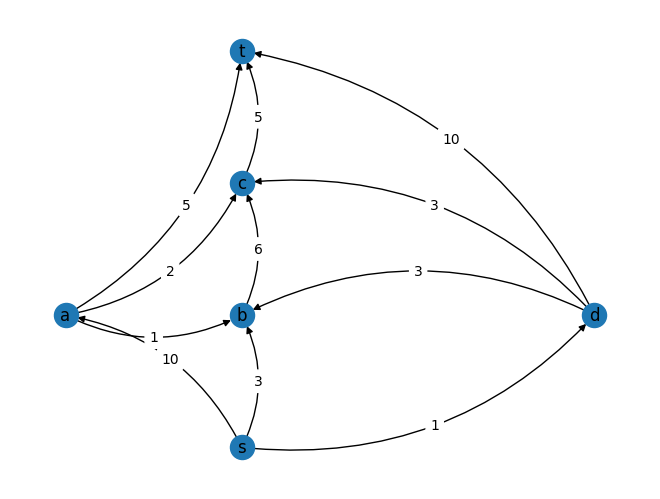

-------------------------
-------------------------
i = 0
Caminho encontrado (fonte para o terminal):
t <- a <- s 
Gargalo (máximo flow no caminho): 5

Flow total: 5

Atualizando as FE e as BE (lançando o fluxo máximo no caminho inverso)
---------
a -> t 
Foward edge
a - - 5 - - > t
Backward edge
t - - 0 - - > a
Decrementando a foward edge
a - - (5 - 5 = 0) - - > t
Incrementando a backward edge
t - - (0 + 5 = 5) - - > a
---------
s -> a 
Foward edge
s - - 10 - - > a
Backward edge
a - - 0 - - > s
Decrementando a foward edge
s - - (10 - 5 = 5) - - > a
Incrementando a backward edge
a - - (0 + 5 = 5) - - > s
---------
Grafo residual atualizado:


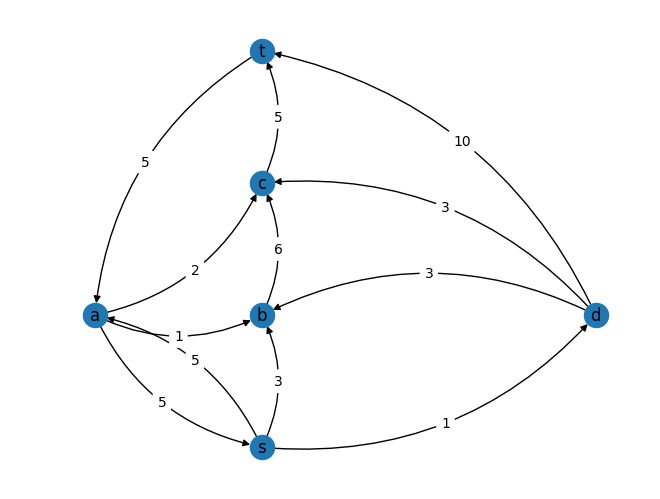

-------------------------
-------------------------
i = 1
Caminho encontrado (fonte para o terminal):
t <- d <- s 
Gargalo (máximo flow no caminho): 1

Flow total: 6

Atualizando as FE e as BE (lançando o fluxo máximo no caminho inverso)
---------
d -> t 
Foward edge
d - - 10 - - > t
Backward edge
t - - 0 - - > d
Decrementando a foward edge
d - - (10 - 1 = 9) - - > t
Incrementando a backward edge
t - - (0 + 1 = 1) - - > d
---------
s -> d 
Foward edge
s - - 1 - - > d
Backward edge
d - - 0 - - > s
Decrementando a foward edge
s - - (1 - 1 = 0) - - > d
Incrementando a backward edge
d - - (0 + 1 = 1) - - > s
---------
Grafo residual atualizado:


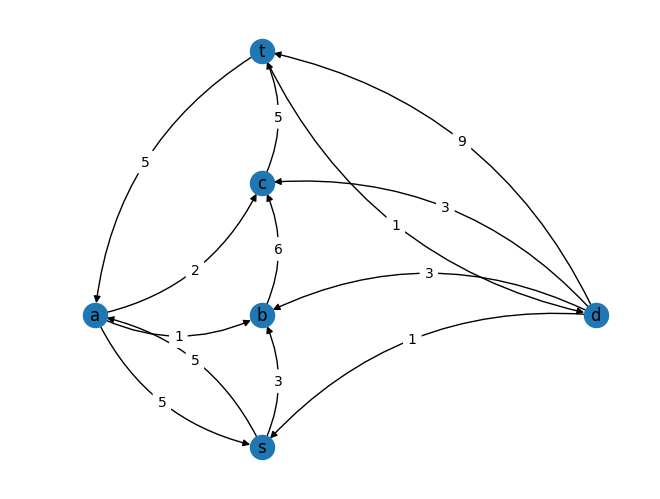

-------------------------
-------------------------
i = 2
Caminho encontrado (fonte para o terminal):
t <- c <- a <- s 
Gargalo (máximo flow no caminho): 2

Flow total: 8

Atualizando as FE e as BE (lançando o fluxo máximo no caminho inverso)
---------
c -> t 
Foward edge
c - - 5 - - > t
Backward edge
t - - 0 - - > c
Decrementando a foward edge
c - - (5 - 2 = 3) - - > t
Incrementando a backward edge
t - - (0 + 2 = 2) - - > c
---------
a -> c 
Foward edge
a - - 2 - - > c
Backward edge
c - - 0 - - > a
Decrementando a foward edge
a - - (2 - 2 = 0) - - > c
Incrementando a backward edge
c - - (0 + 2 = 2) - - > a
---------
s -> a 
Foward edge
s - - 5 - - > a
Backward edge
a - - 5 - - > s
Decrementando a foward edge
s - - (5 - 2 = 3) - - > a
Incrementando a backward edge
a - - (5 + 2 = 7) - - > s
---------
Grafo residual atualizado:


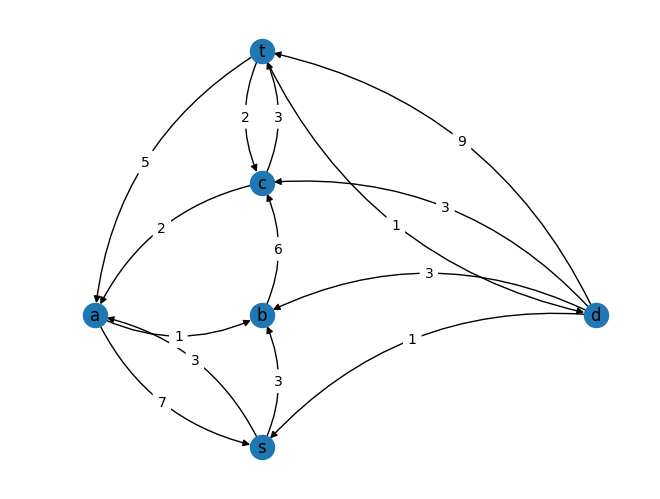

-------------------------
-------------------------
i = 3
Caminho encontrado (fonte para o terminal):
t <- c <- b <- s 
Gargalo (máximo flow no caminho): 3

Flow total: 11

Atualizando as FE e as BE (lançando o fluxo máximo no caminho inverso)
---------
c -> t 
Foward edge
c - - 3 - - > t
Backward edge
t - - 2 - - > c
Decrementando a foward edge
c - - (3 - 3 = 0) - - > t
Incrementando a backward edge
t - - (2 + 3 = 5) - - > c
---------
b -> c 
Foward edge
b - - 6 - - > c
Backward edge
c - - 0 - - > b
Decrementando a foward edge
b - - (6 - 3 = 3) - - > c
Incrementando a backward edge
c - - (0 + 3 = 3) - - > b
---------
s -> b 
Foward edge
s - - 3 - - > b
Backward edge
b - - 0 - - > s
Decrementando a foward edge
s - - (3 - 3 = 0) - - > b
Incrementando a backward edge
b - - (0 + 3 = 3) - - > s
---------
Grafo residual atualizado:


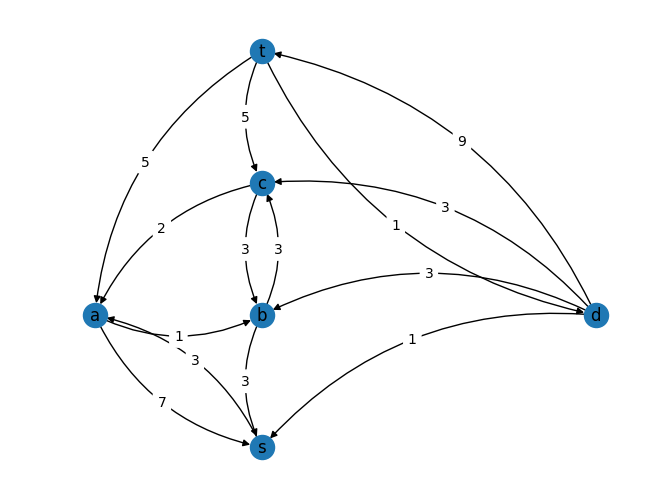

-------------------------
O fluxo máximo possível é 11 


In [509]:
# Create a graph given in the above diagram

graph = [[0, 10, 3, 0, 1, 0],
         [0, 0, 1, 2, 0, 5],
         [0, 0, 0, 6, 0, 0],
         [0, 0, 0, 0, 0, 5],
         [0, 0, 3, 3, 0, 10],
         [0, 0, 0, 0, 0, 0]]

g = Graph(graph)

fonte = 0
terminal = 5

print("O fluxo máximo possível é %d " % FordFulkerson(g, fonte, terminal))


In [ ]:
# Grafo inicial: 

# -------------------------
# -------------------------
# i = 0
# Caminho encontrado (fonte para o terminal):
# t <- a <- s 
# Gargalo (máximo flow no caminho): 5

# Flow total: 5

# Atualizando as FE e as BE (lançando o fluxo máximo no caminho inverso)
# ---------
# a -> t 
# Foward edge
# a - - 5 - - > t
# Backward edge
# t - - 0 - - > a
# Decrementando a foward edge
# a - - (5 - 5 = 0) - - > t
# Incrementando a backward edge
# t - - (0 + 5 = 5) - - > a
# ---------
# s -> a 
# Foward edge
# s - - 10 - - > a
# Backward edge
# a - - 0 - - > s
# Decrementando a foward edge
# s - - (10 - 5 = 5) - - > a
# Incrementando a backward edge
# a - - (0 + 5 = 5) - - > s
# ---------
# Grafo residual atualizado:


# -------------------------
# -------------------------
# i = 1
# Caminho encontrado (fonte para o terminal):
# t <- d <- s 
# Gargalo (máximo flow no caminho): 1

# Flow total: 6

# Atualizando as FE e as BE (lançando o fluxo máximo no caminho inverso)
# ---------
# d -> t 
# Foward edge
# d - - 10 - - > t
# Backward edge
# t - - 0 - - > d
# Decrementando a foward edge
# d - - (10 - 1 = 9) - - > t
# Incrementando a backward edge
# t - - (0 + 1 = 1) - - > d
# ---------
# s -> d 
# Foward edge
# s - - 1 - - > d
# Backward edge
# d - - 0 - - > s
# Decrementando a foward edge
# s - - (1 - 1 = 0) - - > d
# Incrementando a backward edge
# d - - (0 + 1 = 1) - - > s
# ---------
# Grafo residual atualizado:


# -------------------------
# -------------------------
# i = 2
# Caminho encontrado (fonte para o terminal):
# t <- c <- a <- s 
# Gargalo (máximo flow no caminho): 2

# Flow total: 8

# Atualizando as FE e as BE (lançando o fluxo máximo no caminho inverso)
# ---------
# c -> t 
# Foward edge
# c - - 5 - - > t
# Backward edge
# t - - 0 - - > c
# Decrementando a foward edge
# c - - (5 - 2 = 3) - - > t
# Incrementando a backward edge
# t - - (0 + 2 = 2) - - > c
# ---------
# a -> c 
# Foward edge
# a - - 2 - - > c
# Backward edge
# c - - 0 - - > a
# Decrementando a foward edge
# a - - (2 - 2 = 0) - - > c
# Incrementando a backward edge
# c - - (0 + 2 = 2) - - > a
# ---------
# s -> a 
# Foward edge
# s - - 5 - - > a
# Backward edge
# a - - 5 - - > s
# Decrementando a foward edge
# s - - (5 - 2 = 3) - - > a
# Incrementando a backward edge
# a - - (5 + 2 = 7) - - > s
# ---------
# Grafo residual atualizado:


# -------------------------
# -------------------------
# i = 3
# Caminho encontrado (fonte para o terminal):
# t <- c <- b <- s 
# Gargalo (máximo flow no caminho): 3

# Flow total: 11

# Atualizando as FE e as BE (lançando o fluxo máximo no caminho inverso)
# ---------
# c -> t 
# Foward edge
# c - - 3 - - > t
# Backward edge
# t - - 2 - - > c
# Decrementando a foward edge
# c - - (3 - 3 = 0) - - > t
# Incrementando a backward edge
# t - - (2 + 3 = 5) - - > c
# ---------
# b -> c 
# Foward edge
# b - - 6 - - > c
# Backward edge
# c - - 0 - - > b
# Decrementando a foward edge
# b - - (6 - 3 = 3) - - > c
# Incrementando a backward edge
# c - - (0 + 3 = 3) - - > b
# ---------
# s -> b 
# Foward edge
# s - - 3 - - > b
# Backward edge
# b - - 0 - - > s
# Decrementando a foward edge
# s - - (3 - 3 = 0) - - > b
# Incrementando a backward edge
# b - - (0 + 3 = 3) - - > s
# ---------
# Grafo residual atualizado:


# -------------------------
# O fluxo máximo possível é 11